# Phase II Final Project Submission

* Student name: Sarah Lowing
* Student pace: self paced 
* Scheduled project review date/time: Friday 3/3 1:30
* Instructor name: Abhineet Kulkarni
* Blog post URL: https://wordpress.com/post/datamonsterdotblog.wordpress.com/47


## Overview
For this analysis we'll be using the King's County Sales dataset, which can be found in kc_house_data.csv.  Each record represents a house sale in the Seattle area for the year 2021-2022.  We will use this data to determine mean price of a home in each neighborhood using zipcodes to group areas.  After ruling out potential price boosters, such as waterfront homes, or homes with access to amenities such as parks or greenways, we'll also examine the impact of home grade on the price of a home in order to maximize our saving potential for our client, a real estate agent looking to find the elusive midrange home for sale in the Kings County metro area.

### Business Understanding
Purchasing a home is one of the largest financial commitments most people will make in their lifetimes. Today's real estate markets are suffering for a lack of supply of mid-sized starter homes and our client, a real estate agent, specializes in exactly these kinds of homes. We'll find the mean price of a home for each zip code and then look to see what kinds of features- views, access to greenways, the overall condition/grade of a home are most likely to impact price in order to identify what kinds of areas and amenities we should avoid to find a reasonably priced home in the extra tight market and highly inflated real estate market of Seattle. We'll end with a list of recommended neighborhoods for our agent to keep tabs on.

### Data Understanding
After checking our data for missing or null values, we will begin performing some simple statistical analysis to determine which variables have an existing and obvious correlation to our target variable, 'price'.  We'll examine the format of the data (numeric vs categorical, continuous vs discrete) to determine what, if any, transformations need to take place in order to perform  colinearity..  And finally we'll check for normality, and look to apply transformations (linear, logarithmic, polynomial regression or  to any data that does not conform to our L.I.N.E. acronym and is useful for our model and analysis. 

## Preliminary Data Analysis

In [1]:
# import neccessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm

### Inspect and Clean Data
Here we'll load and look over the raw dataset, examining things like mean home price and size to get a feel for what our raw data looks like  

In [2]:
## Check the columns and first few rows
kc= pd.read_csv('Data/kc_house_data.csv')
len(kc)

30155

In [205]:
kc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [4]:
# Generate summary statistics
kc.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


We can see some of our mean values for the raw dataset here and get a rough feel for what to expect.  In it's uncleaned form the 30,155 homes in the kc dataset have a mean price of 1,108,536 dollars, a mean size of 2112 sqft, 3.4 bedrooms.  Next we'll take a look for NaN values to make sure we're not missing any significant pieces of information

##### Checking for NaN

In [4]:
#checking for null values
kc.isnull().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
nuisance          0
view              0
condition         0
grade             0
heat_source      32
sewer_system     14
sqft_above        0
sqft_basement     0
sqft_garage       0
sqft_patio        0
yr_built          0
yr_renovated      0
address           0
lat               0
long              0
dtype: int64

We can see there's not a large number of missing values and so we can just drop them without impacting the outcome of our model significantly.

In [3]:
#Because of the small number of NaN values, we can drop null rows
kc.dropna(inplace=True)

#### Inspect Datatypes of Columns
Now we'll look at the names of our columns and their datatypes in our kc df.  We'll need to examine the datatypes and determine which of our potential predictors are numeric and categorical, as well as examine the non-null count to see if we're missing anything vital.

In [207]:
#Visualize datatypes for future analysis
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

We can see that the data has several different types. Some potentially relevant data for 'price' is categorical, like 'waterfront' and 'condition'.  We'll need to OHE these features if we'd like to add those variables to our model.
None of our numeric variables are categorical in nature, with the exception of 'id', 'lat' and 'long'.  While we won't need these for our statistical analysis, 'lat' and 'long' could come in handy later if we want to map home sales.  

#### Inspect Distribution of Variables
We'll need to check if the distribution of our variables appears normal, which will alert us to outliers or if we will need to transform our data in order to progress with an effective model.  Let's view value counts of our kc dataframe to get a more concrete idea of how our categorical data is distributed and look for outliers

In [4]:
# Value counts for categorical data
categoricals = kc.select_dtypes("object")
categoricals=categoricals.drop(['date', 'address'], axis=1).copy()

In [92]:
for col in categoricals:
    print(kc[col].value_counts(), "\n")

NO     29600
YES      511
Name: waterfront, dtype: int64 

NO     29339
YES      772
Name: greenbelt, dtype: int64 

NO     24862
YES     5249
Name: nuisance, dtype: int64 

NONE         26555
AVERAGE       1910
GOOD           877
EXCELLENT      549
FAIR           220
Name: view, dtype: int64 

Average      18515
Good          8052
Very Good     3258
Fair           225
Poor            61
Name: condition, dtype: int64 

7 Average        11693
8 Good            9400
9 Better          3804
6 Low Average     2852
10 Very Good      1369
11 Excellent       406
5 Fair             385
12 Luxury          122
4 Low               46
13 Mansion          24
3 Poor               9
2 Substandard        1
Name: grade, dtype: int64 

Gas                  20576
Electricity           6460
Oil                   2899
Gas/Solar               93
Electricity/Solar       59
Other                   20
Oil/Solar                4
Name: heat_source, dtype: int64 

PUBLIC                25767
PRIVATE               

There is some interesting information to be gained here.  The "grade" column is not, as I had initially thought, about the grade of the landscape (flat, hilly, steep, etc) but instead is very similar to the "condition" category, and possibly related to sqft_living as we can see there are categories like mansion. We'll dig in deeper to the distribution of the variables  further along, but it's also important to note that there's very few houses that have views, are on the waterfront, or are solar powered.

### Adding Zipcodes to the DataFrame
So far everything looks good.  But it would be nice to have an additional column, "zip", that contains the zip code of each entry so that we can make sure our records are all actually located in King's County, as well as to group houses in neighborhoods for our model later on.  Let's make that now.

In [ ]:
#extract zip codes.  We should have 224 different zipcodes -but there's an extra 176
df_kc['zip'] = df_kc['address'].str.findall(r'([0-9]\d+)').apply(
    lambda x: x[-1] if len(x) >= 1 else '')

In [9]:
# examine zip codes, kc county homes ahould start with 98 but we clearly have some that do not 
zip_counts= df_kc['zip'].value_counts()
zip_counts

98042    988
98038    853
98103    761
98115    757
98117    748
        ... 
55912      1
60411      1
94530      1
80210      1
99701      1
Name: zip, Length: 395, dtype: int64

In [51]:
# closer look at address to double check that entries are erroneous, and not our code.  Clearly some bad data in here
df_bad_zips = df_kc[~df_kc['zip'].astype(str).str.startswith('98')]
df_bad_zips['address']

12       5712 A Street, Omaha, Nebraska 68106, United S...
53       1820 South State Street, Vineland, New Jersey ...
62       1804 Spruce Street, McLeansboro, Illinois 6285...
172      11th Avenue, West Babylon, New York 11704, Uni...
196      South 25th Avenue, Bellevue, Nebraska 68123, U...
                               ...                        
30029    Avenue Cuts, 34 Ridge Rd, North Arlington, New...
30044    36th Avenue, Kenosha, Wisconsin 53142, United ...
30116    57th Street Lane NW, Rochester, Minnesota 5590...
30129    214 B, Mount Laurel, New Jersey 08054, United ...
30144    2954 Northwest 85th Street, Miami, Florida 331...
Name: address, Length: 907, dtype: object

In [ ]:
#Does the address have Seattle, Washington in it?  
df_bad_zips[df_bad_zips['address'].str.contains('Washington')]

In [10]:
# Doesn't look that way, so we'll drop the entries from the df in that are not from the Seattle area (df_bad_zips)
df_clean = df_kc[df_kc['zip'].astype(str).str.startswith('98')]
len(df_kc)

29549

In [97]:
#Check if we've got the right number of records 
bool(len(df_clean) + len(df_bad_zips)==len(df_kc))

True

In [53]:
len(df_bad_zips)

907

## Review of Numeric Variables

This is also a relatively long list of variables/columns.  We'll want to make sure that there's no co-liniarity between the variables in our final model, so we'll take a look at a correlation heatmap of our dataframe to identify possible trouble spots for our numeric variables.

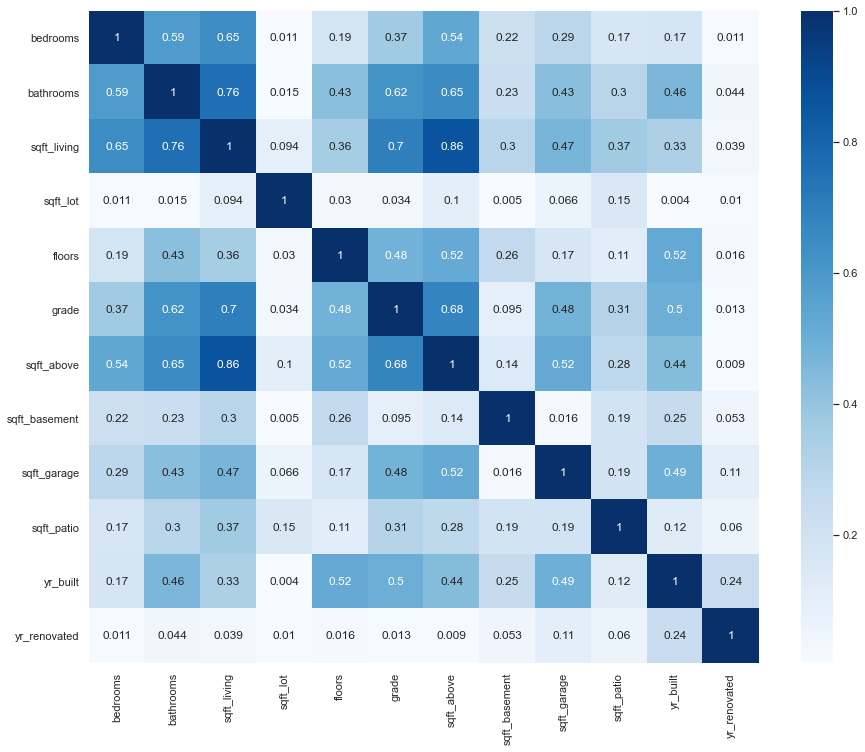

In [11]:
kc_colinearity = df_clean.drop(columns=['price', 'lat', 'long', 'id'])
corr = round(abs(kc_colinearity.corr()),3)
sns.set(rc = {'figure.figsize':(15,12)})
sns.heatmap(corr, cmap="Blues", annot=True);

We can see that there are some trouble spots in here, "sqft_living" has a collinear relationship with "sqft_above", followed by "bathrooms" and "bedrooms", if we use any of these variables it will be sqft_living.   We'll begin by cleaneing/preparing the next variable of interest, 'grade' and then  we'll focus on examining and preparing "sqft_above" for use in a basic linear regression model. 

#### Clean "grade"
We can see the vast number of houses on the market are of average quality.  There are very, very few houses being sold in the Seattle area that in what could be considered 'bad' condition.  We could consider predictors 'cabin' 'substandard', 'poor', 'luxury', and 'mansion' as outliers due to the small number of houses sold in those grades.  It might be worthwhile to drop those categories and clean the reamining names.  We'll keep them as an integer to remove outliers, but  because grade is categorical in nature we'll treat it as such by OHEing when we make our model. 

In [5]:
grade_dict = {'1 Cabin':0, '2 Substandard':1, '3 Poor':2,'4 Low':3,'5 Fair':4,'6 Low Average':5,'7 Average':6, '8 Good':7,
              '9 Better':8, '10 Very Good':9, '11 Excellent':10, '12 Luxury':11, '13 Mansion':12 }
kc.grade.replace(to_replace=grade_dict,inplace=True) 

In [6]:
df_kc= kc[(kc['grade']<10) & (kc['grade']> 2)]

In [7]:
df_kc['grade'].value_counts()

6    11693
7     9400
8     3804
5     2852
9     1369
4      385
3       46
Name: grade, dtype: int64

### Clean "sqft_living"

In [99]:
df_clean['sqft_living'].describe()

count    28642.000000
mean      2076.709413
std        871.500140
min          3.000000
25%       1430.000000
50%       1920.000000
75%       2590.000000
max       7710.000000
Name: sqft_living, dtype: float64

Our std of 871 indicates that we should also be looking for outliers- when considering mean house size, that's a pretty large margin of error (almost 1/2 of the average sized house in KC) and so there must be houses that are exceptionally large that are skewing our model.  We can also see from our min value of 3 that there might be some errors and outliers on the smaller side too, we'll need to remove some of these.  However, we need to be very careful about how we do this, as removing data can lead to model manipulation and less acuuracy overall.  We'll remove all houses in the typical oulier range of 3%, to minimize model manipulation, but gain some accuracy in our predictions.  This will drop considerably fewer records than preserving the middle quartile range, so our model should still be fairly accurate.

In [12]:
#establish quantiles
q_low = df_clean['sqft_living'].quantile(0.03)

q_high = df_clean['sqft_living'].quantile(0.97)

In [13]:
#remove outliers
kc_clean= df_clean[(df_clean['sqft_living']< q_high) & (df_clean['sqft_living']> q_low)]


In [14]:
#check to see how many records were dropped
len(df_clean)-len(kc_clean)

1767

In [103]:
#examine new stats for 'sqft_living'
kc_clean['sqft_living'].describe()

count    26875.000000
mean      2043.032186
std        733.276050
min        850.000000
25%       1460.000000
50%       1930.000000
75%       2540.000000
max       4025.000000
Name: sqft_living, dtype: float64

We can see that our std has dropped to 733 from 871 for sqft_living by dropping 1767 outliers out of 28,642 records.  Let's build our first model to see how sqft_living would interact with 'price' on it's own.

In [16]:
# Build a model to fit a regression line and check the distribution of sqft_living 
y=df_clean['price']
X=df_clean['sqft_living']

sgft_model = sm.OLS(y, sm.add_constant(X))
sqft_results = sgft_model.fit()


In [17]:
sqft_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                 1.424e+04
Date:                Fri, 03 Mar 2023   Prob (F-statistic):               0.00
Time:                        10:40:01   Log-Likelihood:            -4.2006e+05
No. Observations:               28642   AIC:                         8.401e+05
Df Residuals:                   28640   BIC:                         8.401e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.053e+05   8647.412     12.176      0.000    8.83e+04    1.22e+05
sqft_living   458.2126      3.840    119.338      0.000     450.687     465.738
==============================================================================
Omnibus:                    27222.276   Durbin-Watson:                   1.908
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3861326.465
Skew:                           4.196   Prob(JB):                         0.00
Kurtosis:                      59.259   Cond. No.                     5.82e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.82e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Because our model is only explaining about 36% of the variation in our model we can see what we had assumed before- this model is lacking a predictor that explains the jump in price in addition to sqft_living. In this most basic of models, our intercept is 105,300, meaning we would expect a house with 0 sqft to be 105,300 dollars...not very sensical.  The size of the coefficient of the independent variable (sqft_living) is the size of the effect that variable is having on the dependent variable (price), so for each 1 sqft increase we'd expect to see the value of a house increase by 458 dollars.  That puts a 2,000 sqft house at about 916,000 dollars- not that far off from our mean 'price' for the raw kc df, but off enough that we'll have to dig deeper to see what other factors influence price.  In the meantime, let's take a look at the residuals to see if removing outliers had the desired effect on our data.

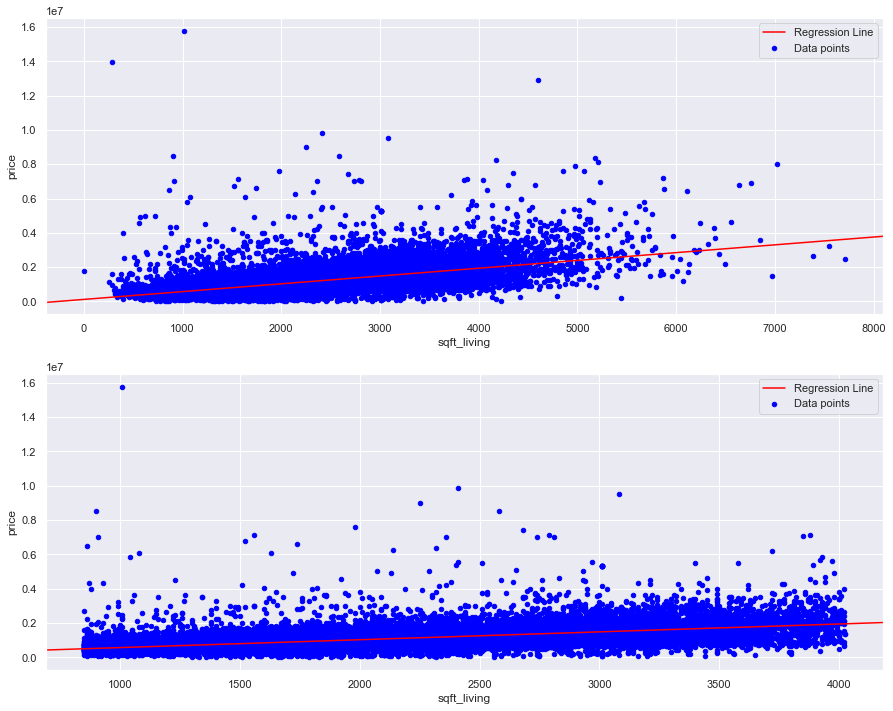

In [18]:
fig, (ax1,ax2) = plt.subplots(2)

df_clean.plot.scatter(x="sqft_living", y="price", label="Data points", color='blue', ax=ax1)
sm.graphics.abline_plot(model_results=sqft_results_raw, label="Regression Line", color='red', ax=ax1)
ax1.legend();

kc_clean.plot.scatter(x="sqft_living", y="price", label="Data points", color='blue', ax=ax2)
sm.graphics.abline_plot(model_results=sqft_results, label="Regression Line", color='red', ax=ax2)
ax2.legend();

We can see that minimizing outliers makes our data more normal distribution, but we're not actually seeing a sharp increase in price per sqft as expected.  Instead, it seems that price increases only marginally as sqft does.  We'll need to examine our other variables to see what else contributes to upticks in prices.  

### Clean Price

Before we do that, let's examine our othe rimportant. numerical data, price to check for a normal distribution and remove outliers.  Then we'll look at a qq plot to examine residuals to see if a log transformation would be helpful for our final model

In [108]:
kc_clean['price'].describe()

count    2.687500e+04
mean     1.023203e+06
std      6.059568e+05
min      2.756300e+04
25%      6.480000e+05
50%      8.550000e+05
75%      1.250000e+06
max      1.574000e+07
Name: price, dtype: float64

In [19]:
std_thresh = kc_clean.price.std()*3
kc_clean= kc_clean[kc_clean['price'] <= std_thresh]

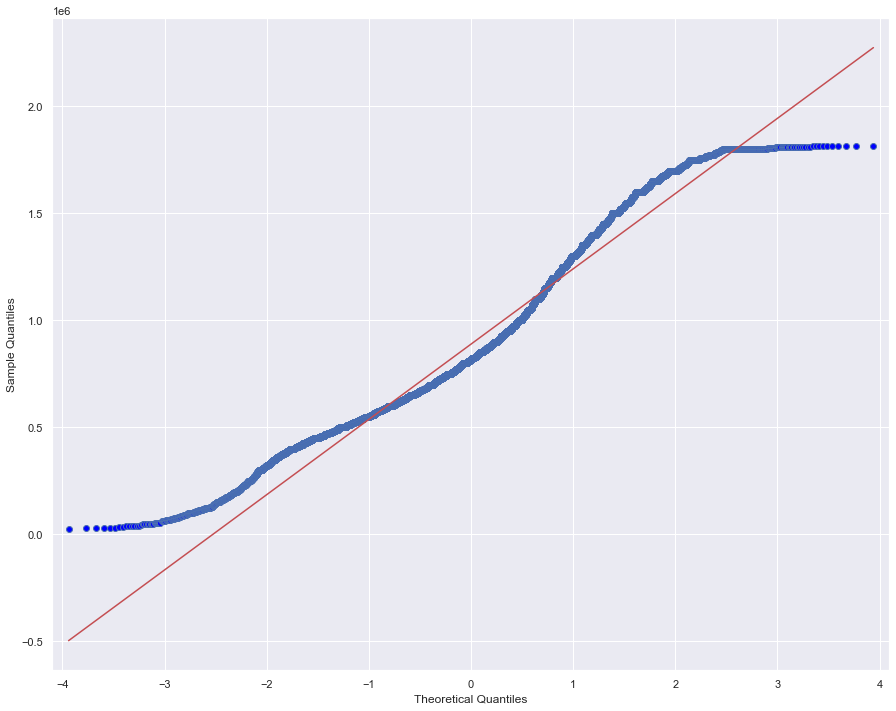

In [20]:
sm.qqplot(kc_clean['price'], line='r');

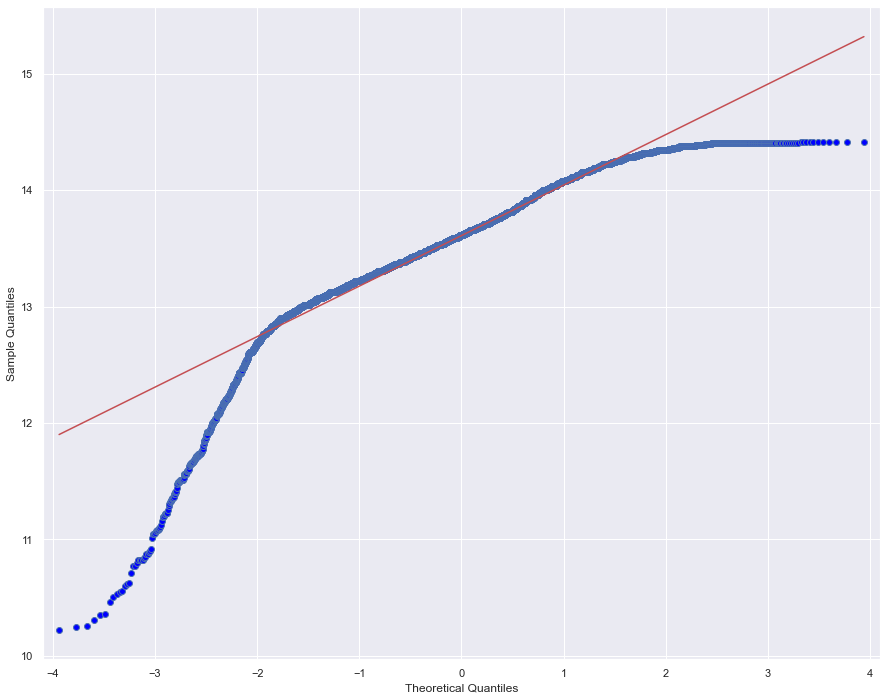

In [21]:
sm.qqplot(np.log(kc_clean['price']), line='r');

Looks like we'd still have a significant number of outliers on the bottom and top range of prices, but that a log transformation would be helpful in our final model

### Summary: Numeric Variables

Our correlation matrix showed that sqft_living had the highest correlation to price.  And we can see from the plot above that when we remove outliers there's a linear relationship between sqft_living and price. However, Our basic model does little to shed light on the predictors that might help us understand home values in KC.  We'll need to examine some other variables to determine what features correlate most strongly to price.
 

## Review of Categorical Data
Lets' begin by looking at a model of all our categorical data to see which predictors would be the best candidates for including in our final model.

In [22]:
categoricals_clean = kc_clean.select_dtypes("object")
categoricals_clean=categoricals_clean.drop(['date', 'address', ], axis=1).copy()

In [23]:
y_raw_cat = kc_clean["price"]
X_raw_cat = categoricals_clean
X_raw_cat = pd.get_dummies(X_raw_cat)

X_raw_cat.drop(['waterfront_YES', 'greenbelt_YES',
               'nuisance_YES', 'condition_Poor',
               'heat_source_Electricity', 'sewer_system_PUBLIC', 'zip_98125'], 
               axis=1, inplace=True)


In [24]:
cat_model= sm.OLS(y_raw_cat, sm.add_constant(X_raw_cat))
cat_results = cat_model.fit()
cat_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     207.1
Date:                Fri, 03 Mar 2023   Prob (F-statistic):               0.00
Time:                        10:40:23   Log-Likelihood:            -3.4106e+05
No. Observations:               24557   AIC:                         6.823e+05
Df Residuals:                   24450   BIC:                         6.832e+05
Df Model:                         106                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                           -8.889e+15   1.39e+16     -0.638      0.524   -3.62e+16    1.84e+16
waterfront_NO                   -1.739e+04   1.89e+04     -0.919      0.358   -5.45e+04    1.97e+04
greenbelt_NO                    -7.794e+04   1.18e+04     -6.623      0.000   -1.01e+05   -5.49e+04
nuisance_NO                       5.07e+04   4614.683     10.987      0.000    4.17e+04    5.97e+04
view_AVERAGE                     8.889e+15   1.39e+16      0.638      0.524   -1.84e+16    3.62e+16
view_EXCELLENT                   8.889e+15   1.39e+16      0.638      0.524   -1.84e+16    3.62e+16
view_FAIR                        8.889e+15   1.39e+16      0.638      0.524   -1.84e+16    3.62e+16
view_GOOD                        8.889e+15   1.39e+16      0.638      0.524   -1.84e+16    3.62e+16
view_NONE                        8.889e+15   1.39e+16      0.638      0.524   -1.84e+16    3.62e+16
condition_Average                2.144e+05   4.12e+04      5.206      0.000    1.34e+05    2.95e+05
condition_Fair                   3.803e+04   4.57e+04      0.832      0.406   -5.16e+04    1.28e+05
condition_Good                   2.274e+05   4.12e+04      5.514      0.000    1.47e+05    3.08e+05
condition_Very Good              2.716e+05   4.14e+04      6.557      0.000     1.9e+05    3.53e+05
heat_source_Electricity/Solar   -8.309e+04    3.8e+04     -2.185      0.029   -1.58e+05   -8537.177
heat_source_Gas                  9.878e+04   4391.848     22.492      0.000    9.02e+04    1.07e+05
heat_source_Gas/Solar            2.166e+05    3.4e+04      6.377      0.000     1.5e+05    2.83e+05
heat_source_Oil                  9805.5415   6452.949      1.520      0.129   -2842.632    2.25e+04
heat_source_Oil/Solar            1.166e+05   1.31e+05      0.892      0.372    -1.4e+05    3.73e+05
heat_source_Other                5.275e+04   6.79e+04      0.777      0.437   -8.03e+04    1.86e+05
sewer_system_PRIVATE             2667.3239   5810.149      0.459      0.646   -8720.923    1.41e+04
sewer_system_PRIVATE RESTRICTED -2.216e+05   1.86e+05     -1.192      0.233   -5.86e+05    1.43e+05
sewer_system_PUBLIC RESTRICTED   2.627e+05   1.85e+05      1.423      0.155   -9.92e+04    6.25e+05
zip_98001                       -3.095e+05   1.65e+04    -18.713      0.000   -3.42e+05   -2.77e+05
zip_98002                       -4.284e+05   1.88e+04    -22.772      0.000   -4.65e+05   -3.91e+05
zip_98003                        -3.58e+05   1.78e+04    -20.066      0.000   -3.93e+05   -3.23e+05
zip_98004                          6.1e+05   3.71e+04     16.460      0.000    5.37e+05    6.83e+05
zip_98005                        4.878e+05   3.29e+04     14.842      0.000    4.23e+05    5.52e+05
zip_98006                        3.738e+05   1.96e+04     19.054      0.000    3.35

Ratther than scroll through this very long report, let's get a summary of our p-values and coefficients to hone in on the most important/relevant predictors.

In [26]:
results_raw = pd.concat([cat_results.params,
                         cat_results.pvalues], axis=1)
results_raw.columns = ["coefficient", "p-value"]
results_raw

,coefficient,p-value
const,-8.888980e+15,5.236567e-01
waterfront_NO,-1.739380e+04,3.582115e-01
greenbelt_NO,-7.794155e+04,3.592784e-11
nuisance_NO,5.070366e+04,5.106491e-28
view_AVERAGE,8.888980e+15,5.236567e-01
...,...,...
zip_98354,-3.141230e+05,1.854056e-08
zip_98372,8.184236e+04,6.580517e-01
zip_98387,-1.471262e+05,5.731879e-01
zip_98422,-7.818506e+05,2.789448e-03


In [27]:
results_raw = results_raw[results_raw["p-value"] < 0.05].sort_values(by="coefficient", ascending=False)
results_raw.head(10)

,coefficient,p-value
zip_98039,617725.861317,1.804285e-02
zip_98004,609997.803883,1.495181e-60
zip_98223,563642.588728,3.090925e-02
zip_98040,527692.536201,2.976854e-67
zip_98075,501125.182176,1.597430e-105
zip_98005,487829.756487,1.281562e-49
zip_98033,389486.294621,1.041370e-84
zip_98006,373792.953087,2.334747e-80
zip_98052,372575.242369,1.373233e-94
zip_98074,365621.129624,8.946656e-71


Our model is statistically significant. There's strong muticollinearity between our variables so moving forward we'll select our predictors more carefully.  Many of our variables are statistically significant, with a significant coefficient value as well.  Our intercept is a ridiculously low number, but using as many variables as we are, we would expect that if none of them were present out home value might be infinitely small.  As expected we see see variables like 'greenbelt_NO', 'waterfront_NO' make a big difference in 'price', as do many of our zips as evidenced by their coefficient values.  Because we dropped the zip code in our model that was closest to the mean price, we can say that for each'zip' we could add or subtract the coefficient value from our intercept to find the gain or loss from the mean value of a house in that zipcode IF our intercept made sense.  But it's a negative number, so at the very least we'd need to mean center this model to make sense of our predictors. Also, for such a high number of predictors we would have expected to see a larger adjusted r-squared.  Our model is clearly missing at least one big component, sqft_living from the numeric predictors.  Before we add that back in let's get a closer look at how some of our predictors interact with mean 'price', starting with our engineered column, 'zip'.

### Clean 'zip'

We took a minute earlier to remove any homes from our df that weren't in Kings County, but we're going to go a little further here and define which parts of KC we'd like to focus on.

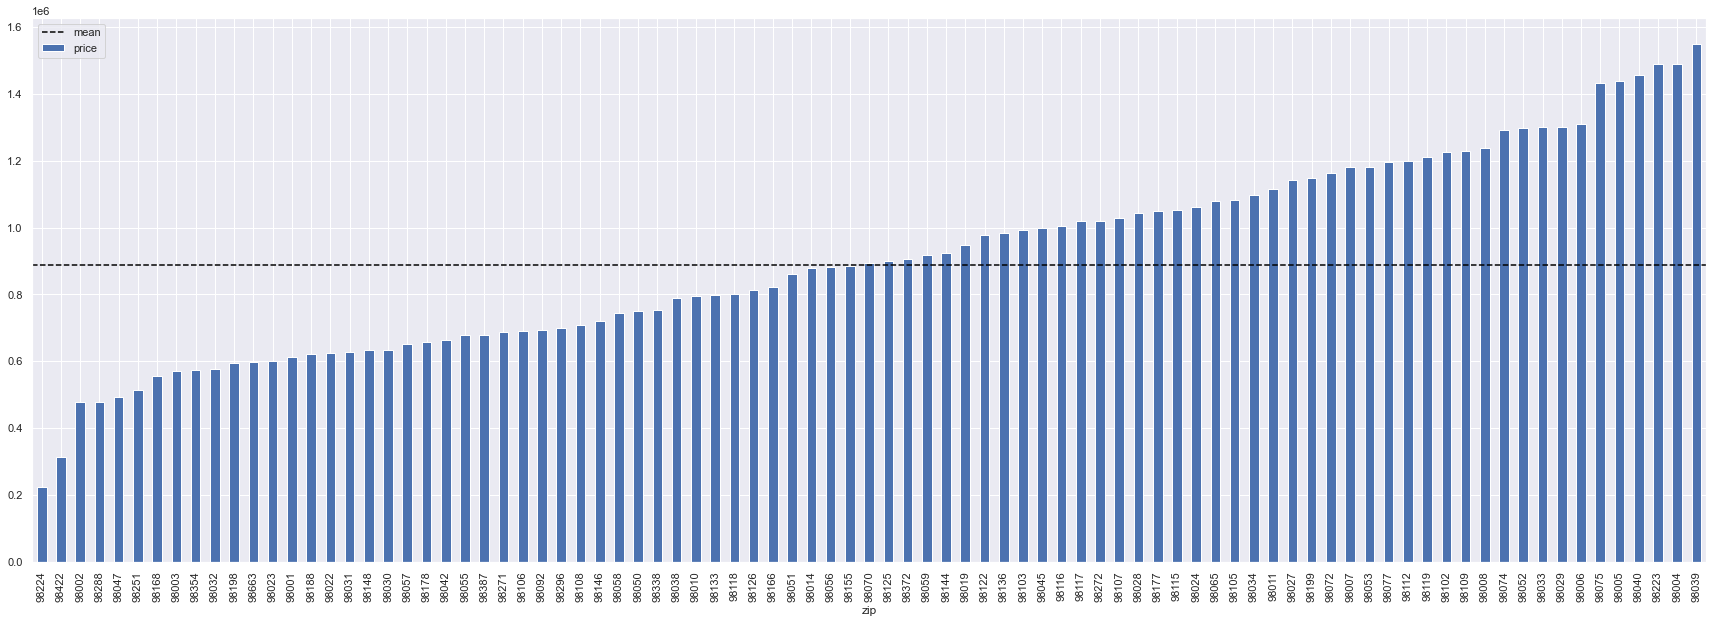

In [28]:
fig, ax = plt.subplots(figsize=(30,10))
kc_clean.groupby("zip").mean().sort_values(by="price").plot.bar(y="price", ax=ax)
ax.axhline(y=kc_clean["price"].mean(), label="mean", color="black", linestyle="--")

ax.legend();

In [123]:
#That's a bit hard to read, let's take a closer look
kc_clean.groupby("zip").mean().sort_values(by="price").head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
zip,,,,,,,,,,,,,,,,
98224,4.017755e+09,224500.000000,2.000000,1.000000,1095.000000,62548.000000,1.250000,5.000000,1095.000000,0.000000,0.000000,110.000000,1950.000000,0.000000,47.768195,-121.481475
98422,1.021039e+09,312750.000000,3.000000,2.000000,2480.000000,6615.000000,2.000000,7.000000,1860.000000,620.000000,0.000000,600.000000,1988.000000,0.000000,47.318740,-122.416100
98002,4.809055e+09,476596.355301,3.286533,1.852436,1577.300860,8215.527221,1.282235,5.684814,1477.618911,205.229226,261.449857,105.819484,1963.303725,97.587393,47.305328,-122.213452
98288,3.867125e+09,478176.923077,2.846154,1.461538,1589.230769,100857.230769,1.500000,5.538462,1412.307692,263.846154,0.000000,401.538462,1952.230769,767.230769,47.710359,-121.332867
98047,5.137973e+09,494134.315789,3.315789,2.085526,1619.039474,10052.315789,1.500000,5.763158,1561.144737,87.763158,388.513158,121.250000,1985.407895,52.592105,47.264319,-122.246684


A very clear mostly linear relationship between price and neighborhoods exists when grouped and sorted by mean price of home for "zip", moving forward it would be interesting to see this mapped out, with a mean price per neighborhood as a pop out on an interactive map.  At the very least, we now have a way of listing neighborhoods where mean house prices are below the mean house price for the Seattle area, which will be helpful for our thrifty agent.  We should note that the linear realtionship between zips and price only exists when grouped by price.  

More importantly, we can use zip codes to limit the kinds of houses we're interested in; Kings county covers roughly 10% of the area of Washington state, and many of these neighborhoods lay far outside the incorporated area of Seattle.  Our client is only interested in the neighborhoods fully inside the Seattle and Tacoma region, so let's drop all zipcodes from outside the those city limits.

In [29]:
# Use outer limits dict to remove undesirable neighborhoods
outer_limits= ['98077','98053', '98014', '98019', '98224', '98024', '98065',
'98027', '98045', '98038', '98022', '98051', '98010', '98288']
kc_clean = kc_clean[~df_clean['zip'].isin(outer_limits)]


<ipython-input-29-990717df7e55>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  kc_clean = kc_clean[~df_clean['zip'].isin(outer_limits)]


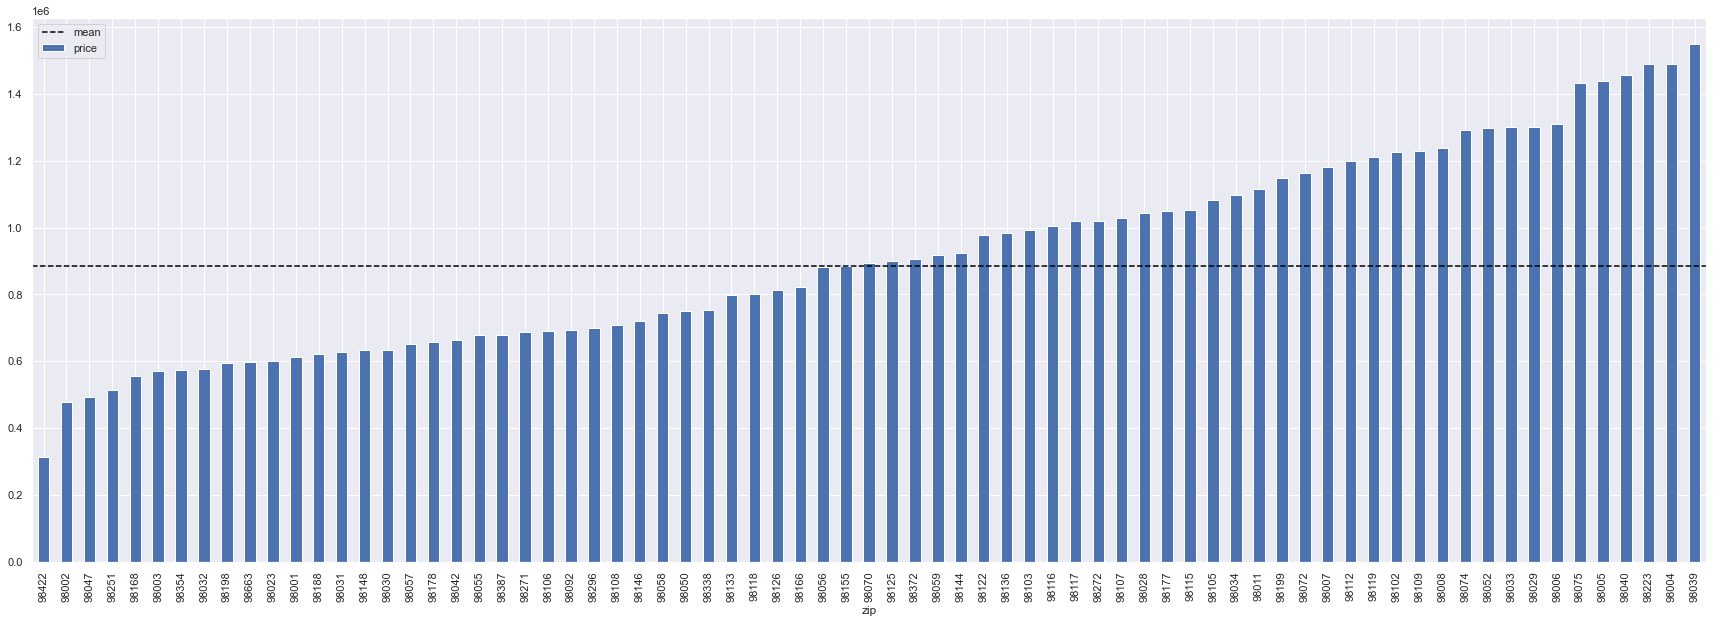

In [30]:
#check mean of zips again
fig, ax = plt.subplots(figsize=(30,10))
kc_clean.groupby("zip").mean().sort_values(by="price").plot.bar(y="price", ax=ax)
ax.axhline(y=kc_clean["price"].mean(), label="mean", color="black", linestyle="--")

ax.legend();

### Review Other Potential Predictors
Now let's review the distribution of our other categorical data to look for unusual values and distributions.  We'll begin by looking at a barplot of waterfront from our df with outliers removed, compared to our original/raw df.

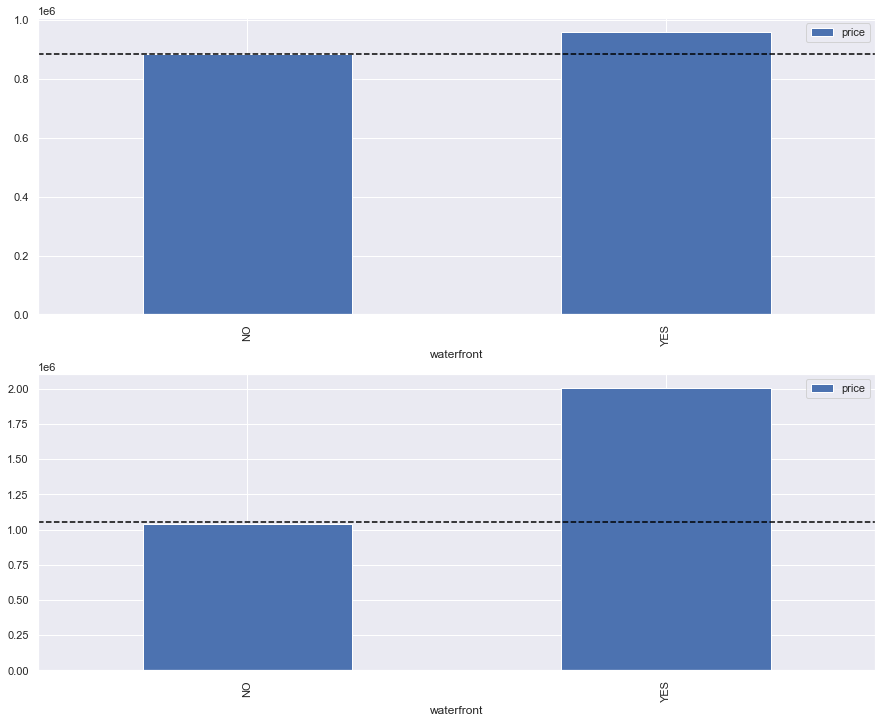

In [124]:
# Waterfront 
fig, (ax1, ax2) = plt.subplots(2)
kc_clean.groupby("waterfront").mean().sort_values(by="price").plot.bar(y="price", ax=ax1)
ax1.axhline(y=kc_clean["price"].mean(), label="mean", color="black", linestyle="--")
df_kc.groupby("waterfront").mean().sort_values(by="price").plot.bar(y="price", ax=ax2)
ax2.axhline(y=df_kc["price"].mean(), label="mean", color="black", linestyle="--")

ax.legend();

In [137]:
print("Clean", kc_clean['waterfront'].value_counts())
print("Original", df_kc['waterfront'].value_counts())

Clean NO     21539
YES      179
Name: waterfront, dtype: int64
Original NO     29469
YES      486
Name: waterfront, dtype: int64


There's clearly a relationship between "price" and waterfront views in our unedited df.  If we hadn't removed outliers we also would need to pay greater attention to the fact that there are very few houses that are on the waterfront, only 486 out of 29,555.  Even now, with only 179 houses the mean price for a waterfront home is still above the regional average.  While outlier values for things like sqft can be viewed easily with a scatterplot, it would have been easy to overlook the outlier qualities of a variable like 'waterfront' without looking more closely at the value counts.  This might be a good candidate for an interaction term with sqft_living if we transform the values from 'NO' and 'YES' to 1 and 2 respectively.  This way the numeric values can be multiplied by 'sqft_living' to better reflect the value of a waterfront home.

There's also likely strong colinearity between "zips" and "waterfront_YES", so as stated before, we should check for colinearity warnings if used in the same model.

Let's move onto 'view'

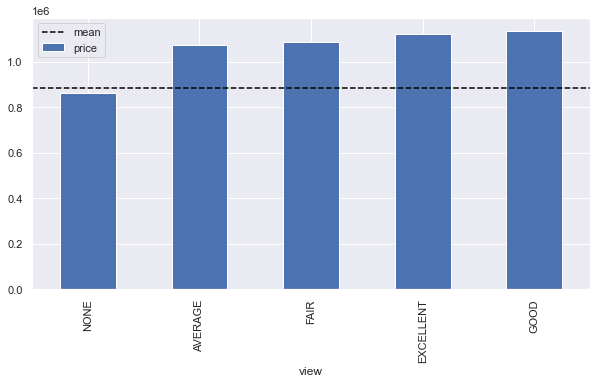

In [125]:
#view
fig, ax = plt.subplots(figsize=(10,5))
kc_clean.groupby("view").mean().sort_values(by="price").plot.bar(y="price", ax=ax)
ax.axhline(y=kc_clean["price"].mean(), label="mean", color="black", linestyle="--")

ax.legend();

In [126]:
kc_clean['view'].value_counts()

NONE         19153
AVERAGE       1189
GOOD           429
EXCELLENT      164
FAIR           137
Name: view, dtype: int64

Not looking great... "good" and excellent look about equal. We can see that houses with no views tend to have mean sales prices that fall below the average price of a house in our cleaned KC data, whereas houses with even an average view are above the mean.  Looking at the value counts, there's again a disproportionate number of houses that do not have views (19661), much like our issue with waterfront. Let's revamp our "view' to boolean yes/no values

In [31]:
#make dictionary and replace values
view_dict = { 'NONE':'NO', "AVERAGE":"YES", "GOOD":"YES", "EXCELLENT": "YES", "FAIR": "YES" }
kc_clean.view.replace(to_replace=view_dict,inplace=True)


In [32]:
#check to see if it worked...
kc_clean['view'].value_counts()

NO     19145
YES     1914
Name: view, dtype: int64

Ok, that worked, let's move onto heatsource and see if going green can also mean more green in a sellers pockets... digression but I'm curious

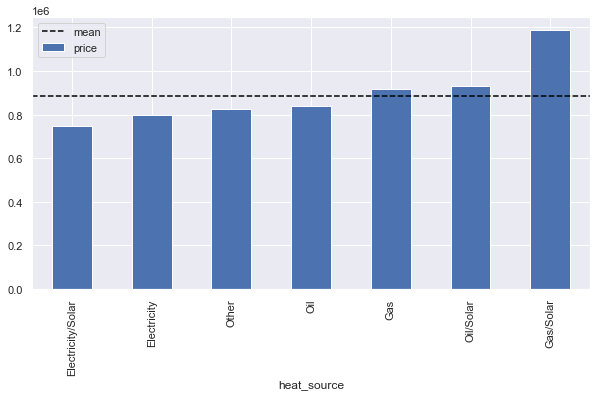

In [129]:
#plot heatsource v price
fig, ax = plt.subplots(figsize=(10,5))
kc_clean.groupby("heat_source").mean().sort_values(by="price").plot.bar(y="price", ax=ax)
ax.axhline(y=kc_clean["price"].mean(), label="mean", color="black", linestyle="--")

ax.legend();

I was curious if having solar power would add to the value of a house, but it looks like only houses that are equipped with gas and solar power experience an uptick in price compared to the median home price in Seattle.  However, it could be that other factors are at play.  Most large houses are unable to run exclusively on solar, and would need a backup for generating heat, hence the gas/solar mix.  There's also a statistically significant relationship between price and sqft so eco-freindly solar only smaller homes would be more likely to have smaller square footage, depressing their sales value. 

Now onto "grade"... we've already discussed this when we cleaned it up, but we'll take a look at several plots to check distribution 

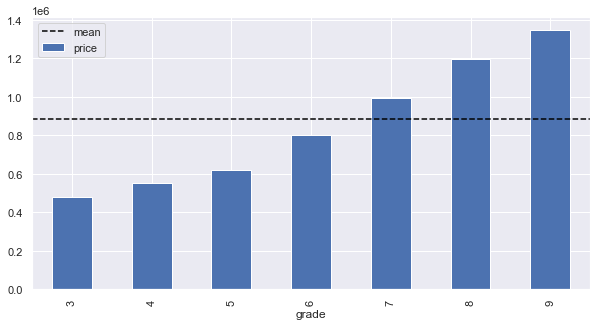

In [132]:

fig, ax = plt.subplots(figsize=(10,5))
kc_clean.groupby("grade").mean().sort_values(by="price").plot.bar(y="price", ax=ax)
ax.axhline(y=kc_clean["price"].mean(), label="mean", color="black", linestyle="--")

ax.legend();

In [130]:
kc_clean['grade'].value_counts()

6    9999
7    6784
5    2022
8    1829
9     280
4     155
3       3
Name: grade, dtype: int64

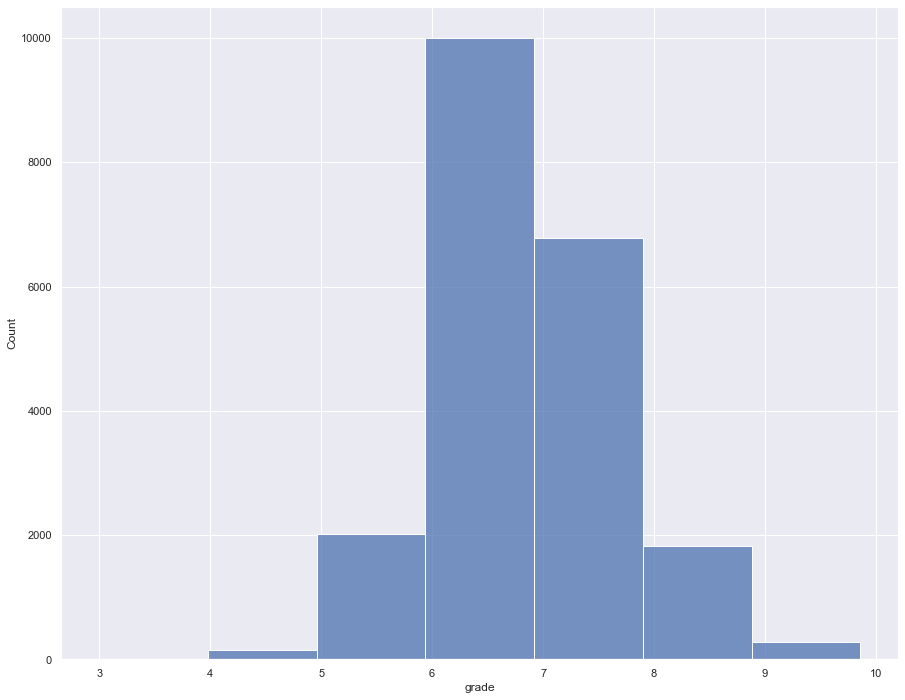

In [131]:
sns.histplot(data=kc_clean, x="grade", binwidth=.98);


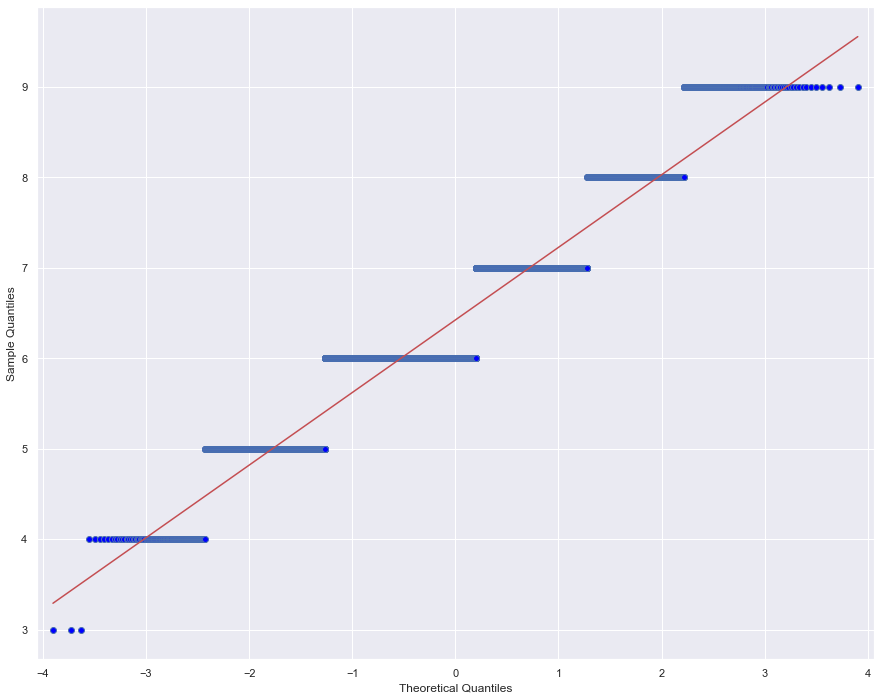

In [133]:
sm.qqplot(kc_clean['grade'], line='r');

This is looking very promising.  Not only does our cleaned grade have a linear relationship to price, it also has an almost normal distribution/residuals before any other kind of transformation. Just to be sure that we'd like to use grade and not condition, we'll take a quick look at that as well.

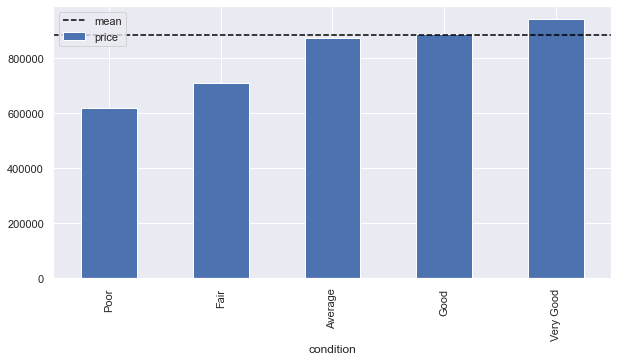

In [46]:
fig, ax = plt.subplots(figsize=(10,5))
kc_clean.groupby("condition").mean().sort_values(by="price").plot.bar(y="price", ax=ax)
ax.axhline(y=kc_clean["price"].mean(), label="mean", color="black", linestyle="--")

ax.legend();

In [48]:
kc_clean['condition'].value_counts()

Average      12312
Good          6152
Very Good     2423
Fair           151
Poor            34
Name: condition, dtype: int64

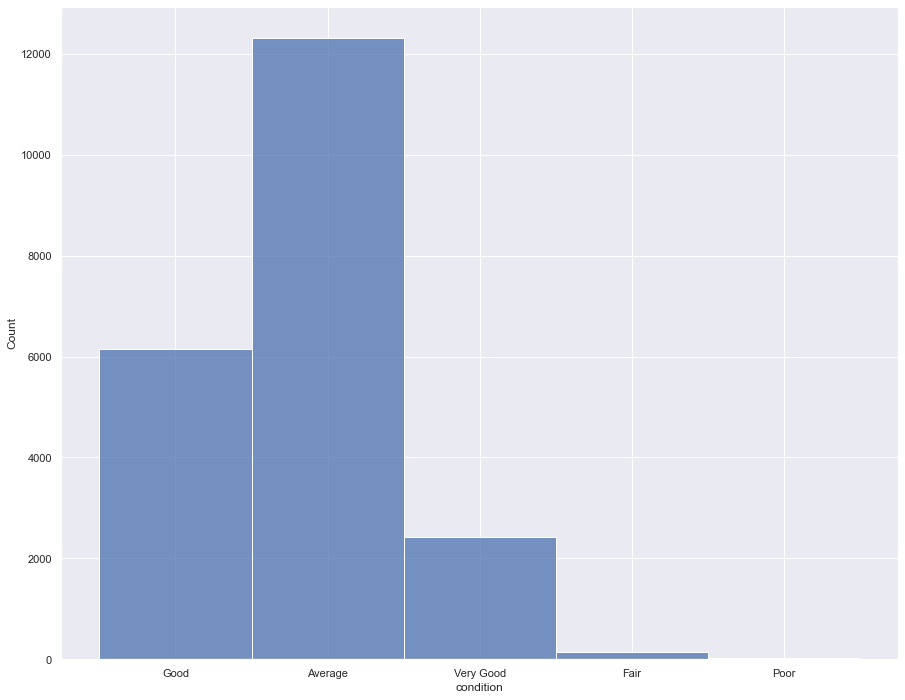

In [49]:
sns.histplot(data=kc_clean, x="condition", binwidth=1);


With the adjustments we made to grade, we would likely not need to use condition, which has an non-linear distribution anyway, making it more of a challange to use in a linear regression model.

### Summary: Categorical Variables

Of the categorical variables, waterfront, zip (when grouped by mean), and grade have the most linear relationships with price. However, knowing that we'll want to exclude zip codes in at least one of our models to identify the change in our mean home price for each neighborhood, we'll use grade both to avoid potential co-linearity between 'zip' and 'waterfront', but also because we know our client isn't interested in houses with extra features or amenities that will bump up price.  

## Final Models

### Putting it all together: Using SqFt, Grade, Zip, Waterfront, and Greenbelt to Locate Affordable Neighborhoods 
Our first model will be unchanged by any kind of linear or logarithmic transformations. 

If the model is correctly specified, then we should see an even distribution of the residuals in a scatter plot

In [33]:
y_baseline = kc_clean["price"]
X_baseline = kc_clean[['grade', 'zip', 'sqft_living', 'waterfront', 'greenbelt', 'view']]
X_baseline = pd.get_dummies(X_baseline, columns=['zip', 'grade', 'waterfront', 'greenbelt', 'view'])
X_baseline.drop(['zip_98039', 'grade_3', 'waterfront_NO', 'greenbelt_YES', 'view_NO'], axis=1, inplace=True)


In [34]:
baseline_model = sm.OLS(y_baseline, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()
baseline_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     464.1
Date:                Fri, 03 Mar 2023   Prob (F-statistic):               0.00
Time:                        10:41:12   Log-Likelihood:            -2.8847e+05
No. Observations:               21059   AIC:                         5.771e+05
Df Residuals:                   20976   BIC:                         5.778e+05
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.226e+06   2.49e+05      4.917      0.000    7.37e+05    1.72e+06
sqft_living      200.3089      2.858     70.086      0.000     194.707     205.911
zip_98001      -1.066e+06   2.16e+05     -4.939      0.000   -1.49e+06   -6.43e+05
zip_98002      -1.075e+06   2.16e+05     -4.978      0.000    -1.5e+06   -6.52e+05
zip_98003      -1.082e+06   2.16e+05     -5.013      0.000   -1.51e+06   -6.59e+05
zip_98004      -1.786e+05   2.18e+05     -0.821      0.412   -6.05e+05    2.48e+05
zip_98005       -2.98e+05   2.17e+05     -1.373      0.170   -7.23e+05    1.28e+05
zip_98006      -4.468e+05   2.16e+05     -2.069      0.039    -8.7e+05   -2.35e+04
zip_98007      -4.649e+05   2.16e+05     -2.148      0.032   -8.89e+05   -4.07e+04
zip_98008       -4.24e+05   2.16e+05     -1.964      0.050   -8.47e+05    -739.607
zip_98011      -6.128e+05   2.16e+05     -2.836      0.005   -1.04e+06   -1.89e+05
zip_98023       -1.09e+06   2.16e+05     -5.049      0.000   -1.51e+06   -6.67e+05
zip_98028      -6.879e+05   2.16e+05     -3.186      0.001   -1.11e+06   -2.65e+05
zip_98029      -4.766e+05   2.16e+05     -2.206      0.027      -9e+05   -5.32e+04
zip_98030      -1.046e+06   2.16e+05     -4.843      0.000   -1.47e+06   -6.22e+05
zip_98031      -1.033e+06   2.16e+05     -4.789      0.000   -1.46e+06    -6.1e+05
zip_98032      -1.045e+06   2.16e+05     -4.834      0.000   -1.47e+06   -6.21e+05
zip_98033      -3.481e+05   2.16e+05     -1.612      0.107   -7.71e+05    7.53e+04
zip_98034      -5.498e+05   2.16e+05     -2.548      0.011   -9.73e+05   -1.27e+05
zip_98040       -3.01e+05   2.17e+05     -1.388      0.165   -7.26e+05    1.24e+05
zip_98042      -1.039e+06   2.16e+05     -4.816      0.000   -1.46e+06   -6.16e+05
zip_98047      -1.065e+06   2.17e+05     -4.909      0.000   -1.49e+06    -6.4e+05
zip_98050      -7.705e+05   3.05e+05     -2.527      0.012   -1.37e+06   -1.73e+05
zip_98052       -4.07e+05   2.16e+05     -1.885      0.059    -8.3e+05    1.61e+04
zip_98055      -1.001e+06   2.16e+05     -4.631      0.000   -1.42e+06   -5.77e+05
zip_98056      -8.107e+05   2.16e+05     -3.756      0.000   -1.23e+06   -3.88e+05
zip_98057      -9.873e+05   2.17e+05     -4.558      0.000   -1.41e+06   -5.63e+05
zip_98058      -9.629e+05   2.16e+05     -4.463      0.000   -1.39e+06    -5.4e+05
zip_98059      -8.071e+05   2.16e+05     -3.740      0.000   -1.23e+06   -3.84e+05
zip_98070      -8.223e+05   2.16e+05     -3.801      0.000   -1.25e+06   -3.98e+05
zip_98072      -5.859e+05   2.16e+05     -2.712      0.007   -1.01e+06   -1.63e+05
zip_98074      -4.779e+05   2.16e+05     -2.212      0.027   -9.01e+05   -5.45e+04
zip_98075      -4.309e+05   2.16e+05     -1.993      0.046   -8.55e+05   -7097.291
zip_98092       -1.07e+06   2.16e+05     -4.961      0.000   -1.49e+06   -6.47e+05
zip_98102   

We can see that our model explains 64% of the variation in it by the r-squared value.   The model is statistically significant overall as demonstrated by the Prob(F-statistic), as are all of our predictors.  We can reject the null hypothesis that neighborhood, home size and house grade have no impact on price.  We do see  co-linearity warnings, so there may be colinearity between grade and sqft_living. We have what appears to be a mostly reasonable intercept of $1,060,000, although that's a large mean price it seems in line with what we could expect to pay for a home or apartment in a top tier metro area.  We'll also want to check our MAE, or mean absolute error, to see by how much our model may be off.  Our Durbin-Watson value is *JUST* between the desired 1-2 ANd the JB values also pretty reasonable given the scale of our y variable (homeprices).  We will run a test to check for homoscedasticity when we examine our models limitations.

In [35]:
# df with coeffiient and p-value.  Will use sorted ce's to find least expensive neighborhoods.
results_df = pd.concat([baseline_results.params, baseline_results.pvalues], axis=1)
results_df.columns = ["coefficient", "p-value"]


In [36]:
# check to see how many predictors are statistically significant- 68 out of 80 is not bad!
results_df = results_df[results_df["p-value"] < 0.05].sort_values(by="coefficient", ascending=False)
results_df.head(20)

,coefficient,p-value
const,1.226389e+06,8.862767e-07
view_YES,1.111041e+05,4.164502e-86
waterfront_YES,1.096812e+05,9.567768e-10
sqft_living,2.003089e+02,0.000000e+00
zip_98008,-4.239952e+05,4.960104e-02
zip_98075,-4.308563e+05,4.628475e-02
zip_98006,-4.468411e+05,3.856042e-02
zip_98007,-4.649261e+05,3.172613e-02
zip_98029,-4.766495e+05,2.738150e-02
zip_98074,-4.779018e+05,2.695967e-02


In [37]:
# what's our mean error going to be?
mae_baseline = baseline_results.resid.abs().sum() / len(y_baseline)
print(mae_baseline) 

154056.94091633847


That's not too bad, in some of the ealier model included in the sandbox our MAE was much higher- but it's still a little high, even for real estate. Let's look at a plot of our residuals to help decide what our next steps should be (if any).

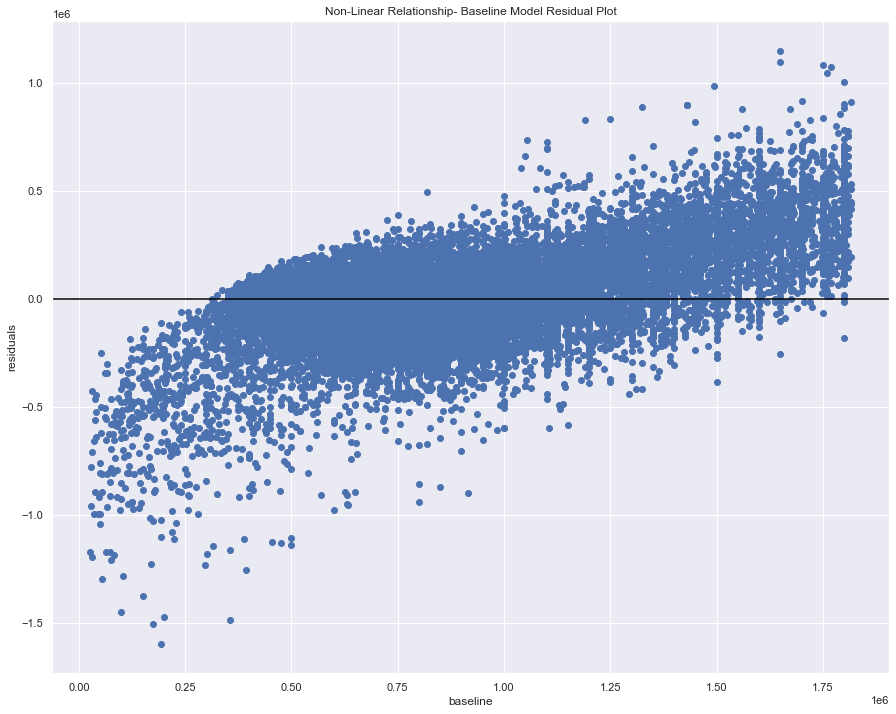

In [38]:

fig, ax = plt.subplots()

ax.scatter(y_baseline, baseline_results.resid)
ax.axhline(y=0, color="black")
ax.set_xlabel("baseline")
ax.set_ylabel("residuals")
ax.set_title("Non-Linear Relationship- Baseline Model Residual Plot");

Definitely not a perfectly normal distribution, although t- it seems like we could log transform our data to improve our residuals after we center our model. But first let's mean center our data to improve interpretability.


### 2nd Model:  Centering Data to Improve Interpretability 

In [39]:
y_centered = y_baseline.copy()
X_centered = X_baseline.copy()

In [40]:
for col in X_centered.columns:
    X_centered[col] = X_centered[col] - X_centered[col].mean()
    
X_centered.describe()

,sqft_living,zip_98001,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98011,...,zip_98663,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,waterfront_YES,greenbelt_NO,view_YES
count,2.105900e+04,2.105900e+04,2.105900e+04,2.105900e+04,2.105900e+04,2.105900e+04,2.105900e+04,2.105900e+04,2.105900e+04,2.105900e+04,...,2.105900e+04,2.105900e+04,2.105900e+04,2.105900e+04,2.105900e+04,2.105900e+04,2.105900e+04,2.105900e+04,2.105900e+04,2.105900e+04
mean,5.839009e-14,-7.802508e-18,-4.576065e-18,-2.150962e-18,-1.412887e-18,-2.361840e-18,7.591629e-19,-8.856901e-19,-6.663763e-18,-4.850207e-18,...,-2.635982e-20,3.795815e-19,2.509455e-17,8.435143e-18,-4.335664e-17,1.265272e-18,1.054393e-18,-8.856901e-19,-3.905471e-17,-6.916818e-18
std,6.567278e+02,1.677156e-01,1.276660e-01,1.406238e-01,5.150000e-02,5.917563e-02,1.190874e-01,7.742475e-02,1.225204e-01,1.048270e-01,...,9.745089e-03,8.520361e-02,2.942290e-01,4.993672e-01,4.672722e-01,2.816236e-01,1.145418e-01,8.817091e-02,1.254883e-01,2.874559e-01
min,-1.059507e+03,-2.896624e-02,-1.657249e-02,-2.018140e-02,-2.659196e-03,-3.513937e-03,-1.438815e-02,-6.030676e-03,-1.524289e-02,-1.111164e-02,...,-9.497127e-05,-7.312788e-03,-9.573104e-02,-4.746189e-01,-3.220476e-01,-8.685123e-02,-1.329598e-02,-7.835130e-03,-9.839973e-01,-9.088751e-02
25%,-5.095075e+02,-2.896624e-02,-1.657249e-02,-2.018140e-02,-2.659196e-03,-3.513937e-03,-1.438815e-02,-6.030676e-03,-1.524289e-02,-1.111164e-02,...,-9.497127e-05,-7.312788e-03,-9.573104e-02,-4.746189e-01,-3.220476e-01,-8.685123e-02,-1.329598e-02,-7.835130e-03,1.600266e-02,-9.088751e-02
50%,-9.950748e+01,-2.896624e-02,-1.657249e-02,-2.018140e-02,-2.659196e-03,-3.513937e-03,-1.438815e-02,-6.030676e-03,-1.524289e-02,-1.111164e-02,...,-9.497127e-05,-7.312788e-03,-9.573104e-02,-4.746189e-01,-3.220476e-01,-8.685123e-02,-1.329598e-02,-7.835130e-03,1.600266e-02,-9.088751e-02
75%,4.204925e+02,-2.896624e-02,-1.657249e-02,-2.018140e-02,-2.659196e-03,-3.513937e-03,-1.438815e-02,-6.030676e-03,-1.524289e-02,-1.111164e-02,...,-9.497127e-05,-7.312788e-03,-9.573104e-02,5.253811e-01,6.779524e-01,-8.685123e-02,-1.329598e-02,-7.835130e-03,1.600266e-02,-9.088751e-02
max,2.115493e+03,9.710338e-01,9.834275e-01,9.798186e-01,9.973408e-01,9.964861e-01,9.856119e-01,9.939693e-01,9.847571e-01,9.888884e-01,...,9.999050e-01,9.926872e-01,9.042690e-01,5.253811e-01,6.779524e-01,9.131488e-01,9.867040e-01,9.921649e-01,1.600266e-02,9.091125e-01


In [41]:
X_centered_model = sm.OLS(y_centered, sm.add_constant(X_centered))
X_centered_results = X_centered_model.fit()
X_centered_results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     464.1
Date:                Fri, 03 Mar 2023   Prob (F-statistic):               0.00
Time:                        10:42:15   Log-Likelihood:            -2.8847e+05
No. Observations:               21059   AIC:                         5.771e+05
Df Residuals:                   20976   BIC:                         5.778e+05
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           8.844e+05   1485.666    595.276      0.000    8.81e+05    8.87e+05
sqft_living      200.3089      2.858     70.086      0.000     194.707     205.911
zip_98001      -1.066e+06   2.16e+05     -4.939      0.000   -1.49e+06   -6.43e+05
zip_98002      -1.075e+06   2.16e+05     -4.978      0.000    -1.5e+06   -6.52e+05
zip_98003      -1.082e+06   2.16e+05     -5.013      0.000   -1.51e+06   -6.59e+05
zip_98004      -1.786e+05   2.18e+05     -0.821      0.412   -6.05e+05    2.48e+05
zip_98005       -2.98e+05   2.17e+05     -1.373      0.170   -7.23e+05    1.28e+05
zip_98006      -4.468e+05   2.16e+05     -2.069      0.039    -8.7e+05   -2.35e+04
zip_98007      -4.649e+05   2.16e+05     -2.148      0.032   -8.89e+05   -4.07e+04
zip_98008       -4.24e+05   2.16e+05     -1.964      0.050   -8.47e+05    -739.607
zip_98011      -6.128e+05   2.16e+05     -2.836      0.005   -1.04e+06   -1.89e+05
zip_98023       -1.09e+06   2.16e+05     -5.049      0.000   -1.51e+06   -6.67e+05
zip_98028      -6.879e+05   2.16e+05     -3.186      0.001   -1.11e+06   -2.65e+05
zip_98029      -4.766e+05   2.16e+05     -2.206      0.027      -9e+05   -5.32e+04
zip_98030      -1.046e+06   2.16e+05     -4.843      0.000   -1.47e+06   -6.22e+05
zip_98031      -1.033e+06   2.16e+05     -4.789      0.000   -1.46e+06    -6.1e+05
zip_98032      -1.045e+06   2.16e+05     -4.834      0.000   -1.47e+06   -6.21e+05
zip_98033      -3.481e+05   2.16e+05     -1.612      0.107   -7.71e+05    7.53e+04
zip_98034      -5.498e+05   2.16e+05     -2.548      0.011   -9.73e+05   -1.27e+05
zip_98040       -3.01e+05   2.17e+05     -1.388      0.165   -7.26e+05    1.24e+05
zip_98042      -1.039e+06   2.16e+05     -4.816      0.000   -1.46e+06   -6.16e+05
zip_98047      -1.065e+06   2.17e+05     -4.909      0.000   -1.49e+06    -6.4e+05
zip_98050      -7.705e+05   3.05e+05     -2.527      0.012   -1.37e+06   -1.73e+05
zip_98052       -4.07e+05   2.16e+05     -1.885      0.059    -8.3e+05    1.61e+04
zip_98055      -1.001e+06   2.16e+05     -4.631      0.000   -1.42e+06   -5.77e+05
zip_98056      -8.107e+05   2.16e+05     -3.756      0.000   -1.23e+06   -3.88e+05
zip_98057      -9.873e+05   2.17e+05     -4.558      0.000   -1.41e+06   -5.63e+05
zip_98058      -9.629e+05   2.16e+05     -4.463      0.000   -1.39e+06    -5.4e+05
zip_98059      -8.071e+05   2.16e+05     -3.740      0.000   -1.23e+06   -3.84e+05
zip_98070      -8.223e+05   2.16e+05     -3.801      0.000   -1.25e+06   -3.98e+05
zip_98072      -5.859e+05   2.16e+05     -2.712      0.007   -1.01e+06   -1.63e+05
zip_98074      -4.779e+05   2.16e+05     -2.212      0.027   -9.01e+05   -5.45e+04
zip_98075      -4.309e+05   2.16e+05     -1.993      0.046   -8.55e+05   -7097.291
zip_98092       -1.07e+06   2.16e+05     -4.961      0.000   -1.49e+06   -6.47e+05
zip_98102   

Ok!  This makes our coefficiants much more interpretable.  Our intercept is now 884,000, or the mean price of a house in our slice of incorporated King County.  We dropped our most expenzive zipcode, 'zip_98039' from the dataframe, so we can say that for any given zipcode the mean price is x percent smaller than our most expensive zip. We can also see that just by elimating waterfront houses, our client can expect to see a 189,900 drop in the mean price of a home, and that by avoiding greenbelt access they could expect to see a much smaller drop of $5656 from the mean.  With that in mind, it might be worth it to target areas in more affordable neighborhoods near parks and other greenbelt amenities.


In [43]:
results2_df = pd.concat([X_centered_results.params,
                         X_centered_results.pvalues], axis=1)
results2_df.columns = ["coefficient", "p-value"]
results2_df

,coefficient,p-value
const,8.843814e+05,0.000000e+00
sqft_living,2.003089e+02,0.000000e+00
zip_98001,-1.065697e+06,7.920984e-07
zip_98002,-1.074879e+06,6.464729e-07
zip_98003,-1.082100e+06,5.399337e-07
...,...,...
grade_8,1.712541e+05,1.707131e-01
grade_9,1.881052e+05,1.343693e-01
waterfront_YES,1.096812e+05,9.567768e-10
greenbelt_NO,-7.879945e+03,5.175472e-01


In [44]:
results2_df = results2_df[results2_df["p-value"] < 0.05].sort_values(by="coefficient")
results2_df=results2_df.sort_values(by="p-value")

results2_df.head(20)

,coefficient,p-value
const,8.843814e+05,0.000000e+00
sqft_living,2.003089e+02,0.000000e+00
view_YES,1.111041e+05,4.164502e-86
waterfront_YES,1.096812e+05,9.567768e-10
zip_98422,-1.592951e+06,1.773668e-07
zip_98023,-1.089523e+06,4.467381e-07
zip_98003,-1.082100e+06,5.399337e-07
zip_98002,-1.074879e+06,6.464729e-07
zip_98092,-1.070475e+06,7.084342e-07
zip_98001,-1.065697e+06,7.920984e-07


In [316]:
# Our mean error gshould remain the same
mae_baseline = X_centered_results.resid.abs().sum() / len(y_raw)
print(mae_baseline) 

155937.0856085364


### 3rd Model: Log Transform 'price'


For this model we'll log transform sqft_living to deal with our linearity issues.

In [45]:
X_log=X_baseline.copy()
X_log["log_sqft_living"] = np.log(X_log['sqft_living'])
X_log.drop('sqft_living', axis=1, inplace=True)


In [46]:
y_log = np.log(kc_clean['price'])
X_log_model = sm.OLS(y_log, sm.add_constant(X_log))
X_log_results = X_log_model.fit()
X_log_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     304.4
Date:                Fri, 03 Mar 2023   Prob (F-statistic):               0.00
Time:                        10:42:32   Log-Likelihood:                -4922.2
No. Observations:               21059   AIC:                         1.001e+04
Df Residuals:                   20976   BIC:                         1.067e+04
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              11.0096      0.358     30.729      0.000      10.307      11.712
zip_98001          -1.1073      0.307     -3.612      0.000      -1.708      -0.506
zip_98002          -1.1900      0.307     -3.880      0.000      -1.791      -0.589
zip_98003          -1.1471      0.307     -3.741      0.000      -1.748      -0.546
zip_98004          -0.2162      0.309     -0.700      0.484      -0.822       0.389
zip_98005          -0.3088      0.308     -1.001      0.317      -0.913       0.296
zip_98006          -0.4301      0.307     -1.402      0.161      -1.031       0.171
zip_98007          -0.4065      0.307     -1.322      0.186      -1.009       0.196
zip_98008          -0.3721      0.307     -1.213      0.225      -0.973       0.229
zip_98011          -0.5672      0.307     -1.848      0.065      -1.169       0.034
zip_98023          -1.1289      0.307     -3.683      0.000      -1.730      -0.528
zip_98028          -0.6512      0.307     -2.123      0.034      -1.253      -0.050
zip_98029          -0.4567      0.307     -1.488      0.137      -1.058       0.145
zip_98030          -1.0780      0.307     -3.515      0.000      -1.679      -0.477
zip_98031          -1.0693      0.307     -3.488      0.000      -1.670      -0.468
zip_98032          -1.0987      0.307     -3.577      0.000      -1.701      -0.497
zip_98033          -0.3185      0.307     -1.038      0.299      -0.920       0.283
zip_98034          -0.4930      0.307     -1.608      0.108      -1.094       0.108
zip_98040          -0.3153      0.308     -1.024      0.306      -0.919       0.288
zip_98042          -1.0515      0.306     -3.431      0.001      -1.652      -0.451
zip_98047          -1.1613      0.308     -3.767      0.000      -1.766      -0.557
zip_98050          -0.6628      0.433     -1.530      0.126      -1.512       0.186
zip_98052          -0.3751      0.307     -1.223      0.221      -0.976       0.226
zip_98055          -1.0042      0.307     -3.271      0.001      -1.606      -0.402
zip_98056          -0.8057      0.307     -2.628      0.009      -1.407      -0.205
zip_98057          -0.9829      0.308     -3.194      0.001      -1.586      -0.380
zip_98058          -0.9462      0.307     -3.087      0.002      -1.547      -0.345
zip_98059          -0.7678      0.307     -2.504      0.012      -1.369      -0.167
zip_98070          -0.8039      0.307     -2.616      0.009      -1.406      -0.202
zip_98072          -0.5599      0.307     -1.825      0.068      -1.161       0.042
zip_98074          -0.4540      0.307     -1.479      0.139      -1.056       0.148
zip_98075          -0.4185      0.307     -1.363      0.173      -1.021       0.183
zip_98092          -1.0818      0.307     -3.529      0.000      -1.683      -0.481
zip_98102          -0.4662      0.308     -1.515      0.130

Now that we've log transformed sqft_living and price we'd have to desribe it's coefficients using percentages rather than dollar increase.  In other words, for every 1% increase in price we'd see our predictor increase by the percentage of it's coefficient value. That's pretty hard to follow when it comes to zipcodes, although it makes slightly more sense when talking about home grade or sqft_living.  Before we take time to describe the changes to our most important predictors(if any) we want to check to see if our residuals are better distributed- if not we'll scrap this model and use our Baseline or Centered models to interpret our coefficients.

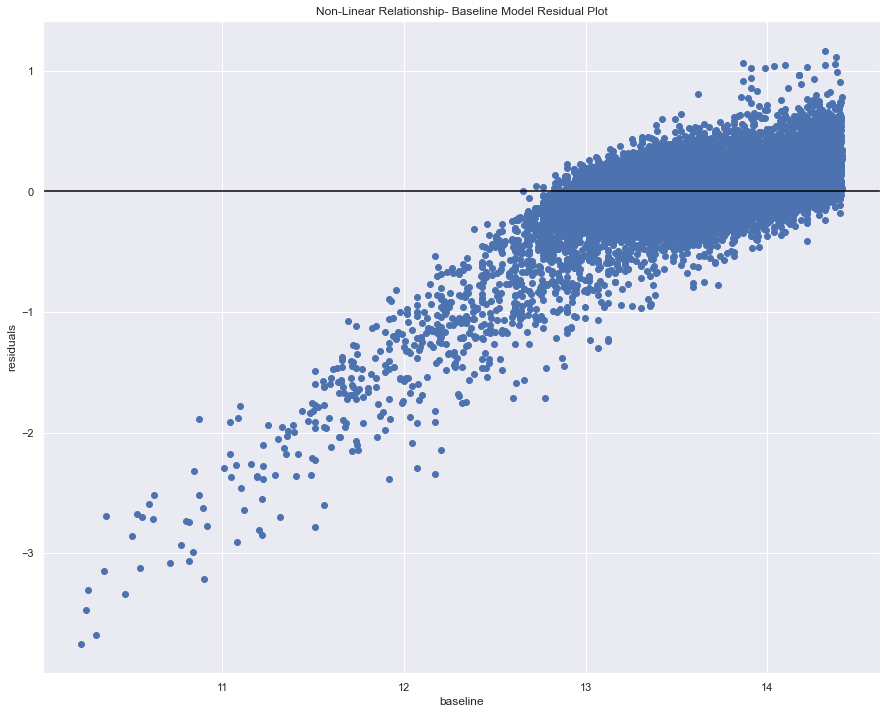

In [47]:

fig, ax = plt.subplots()

ax.scatter(y_log, X_log_results.resid)
ax.axhline(y=0, color="black")
ax.set_xlabel("baseline")
ax.set_ylabel("residuals")
ax.set_title("Non-Linear Relationship- Baseline Model Residual Plot");

Not only is our adjusted r-squared less, but out model residuals are concentrated in a sweep to the upper left.  This model is not accurate enough for use, and our baseline and centered models would be better for describing coefficient values for our client anyway.

In [48]:
mae_baseline = baseline_results.resid.abs().sum() / len(y_log)
print("centered MAE:", mae_baseline)
mae_log_centered = X_log_results.resid.abs().sum() / len(y_log)
print("Log MAE:", mae_log_centered)

centered MAE: 154056.94091633847
Log MAE: 0.1853436484379025


At first glance, it may seem as if we've radically improved our MAE, but we need to remember that a log transformation changes the units we ae using from dollars to a decimal/percentage.  This makes it a little challenging to compare the two.  But a cursory glance tells us that the log transformed model is roughly 20% off- much higher than the approximately 10% of our Baseline and Centered models.

## Limitations

### Checking L.I.N.E.

* Linear relationship between the response variable (y) and predictor (x).  
   

* Data is independent: 1. Data avoids collinearity (features can't be used to predict each other)  2.  Data is not autocorrelated (correlated with itself)


* Model residuals are normally distributed
   

* Homoscedasticity- data has an equal variance


#### Linearity


We can check our linearity of our models by using a scatterplot of of the response variable (y) and the predictor (x).  We should see a constant change in y by a one unit change in x, as we did in our initial conversion of 'sqft_living' and 'grade' when we removed outliers.

#### Independence of Features and Errors

If we wanted to check that assumtion we could run a pairplot to check for coliearity between our response variable and predictors.  Our model warnings indicated that some colinearity existed.

Autocorrelation, where a variable becomes correlated with itself will be harder to check for

#### Normally Distributed Residuals

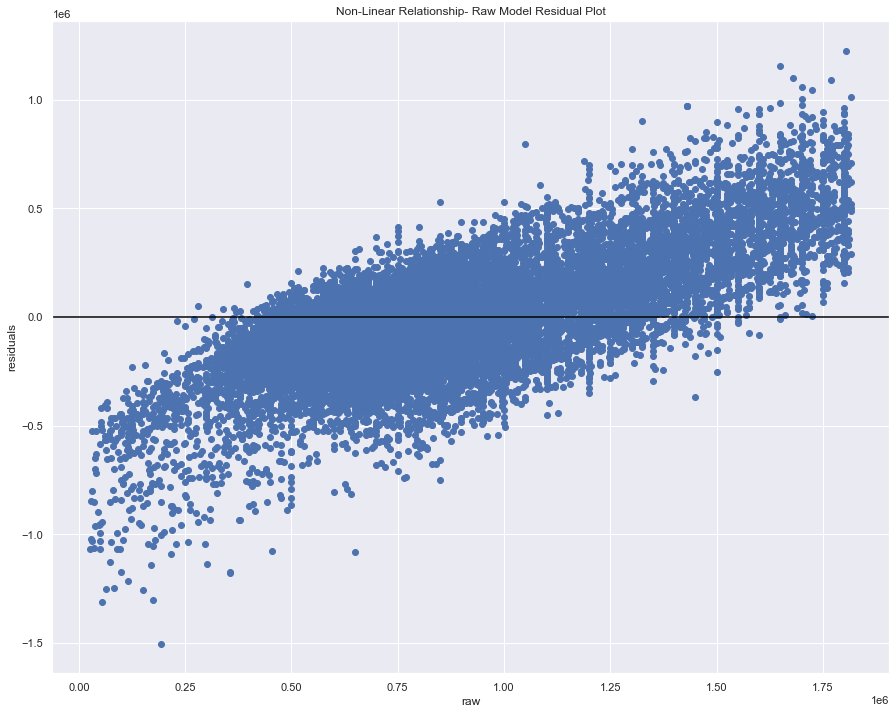

In [345]:
fig, ax = plt.subplots()

ax.scatter(y_raw_cat, cat_results.resid)
ax.axhline(y=0, color="black")
ax.set_xlabel("raw")
ax.set_ylabel("residuals")
ax.set_title("Non-Linear Relationship- Raw Model Residual Plot");

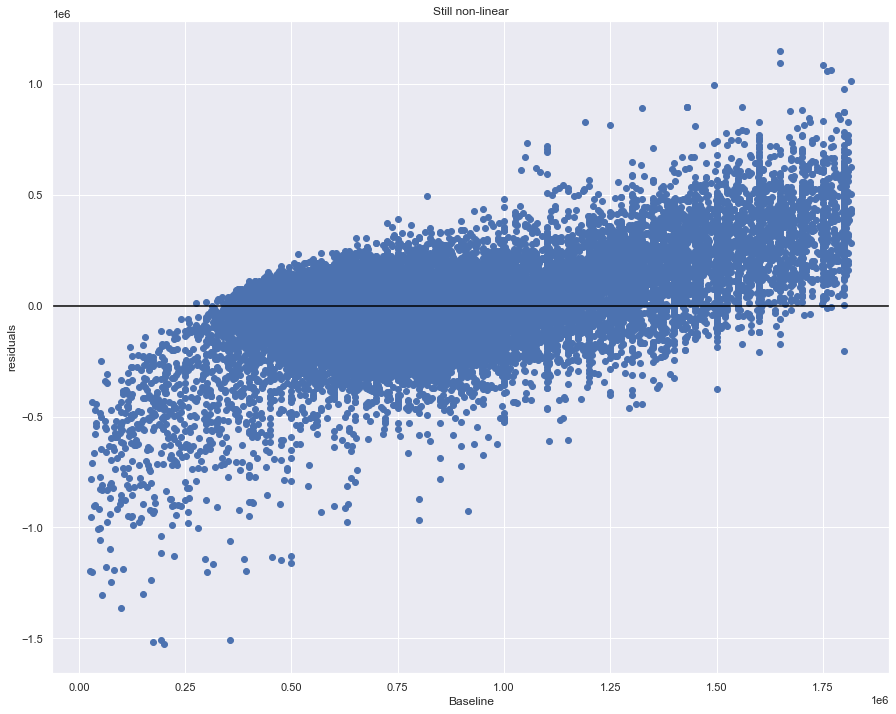

In [144]:
fig, ax = plt.subplots()

ax.scatter(y_baseline, baseline_results.resid)
ax.axhline(y=0, color="black")
ax.set_xlabel("Baseline")
ax.set_ylabel("residuals")
ax.set_title("Still non-linear");

If our data were normally distributed we would see our residuals scattered across the plot rather than clumped together like we do here.  But our final model is a marked improvement of our all categorical model.

#### Equal Variance/Homoscedasticity
Let's prove that there's a non-linear relationship between the variables in our model and price statistically as well by using a rainbow test.  In a rainbow test, even if the true relationship is non-linear, a good linear fit can be achieved on a subsample in the “middle” of the data, in the arc of the "rainbow".  The null hypothesis is the fit of the model using full sample is the same as using a central subset. The null hypothesis is rejected whenever the overall fit is significantly worse than the fit for the subsample.  A rainbow test returns the f-statistic and p-value, and unlike the way we usually interpret p-values (a low score is good) in this instance, a low score would indicate a non-linear relationship.

In [351]:
import statsmodels.api as sms
 

print("Baseline results:", sms.stats.diagnostic.linear_rainbow(baseline_results))
print("Log results:", sms.stats.diagnostic.linear_rainbow(X_log_results))

Baseline results: (0.9430075587483235, 0.9986754129300249)
Log results: (0.9445674716558311, 0.9982560609610807)


## Recommendations

### Neighborhoods
Using our final model we have identified which neighborhoods we would be able to locate housing that would be in the lowest mean price by zipcode.  We can also see that we'll want to look for houses that are in low to average grade, as we see prices jumping over the median once we've crossed the average threshhold.  Additionally, while we'll want to avoid waterfront homes because of the significant jump in price (about a million dollars), our real estate agent might want to target homes that are located near greenbelts or parks, which have a significantly lower jump in price- around 5,500.

## Next Steps

Affordable housing is a challange to find in the best of times, and often neighborhoods with lower housing prices are located nearby inherant health dangers like freeways or large industrial areas, or lack the kinds of amennities that inhance quality of life, like greenspaces and grocery stores.  Our next steps would be overlay a map of such amenities or dangers over the neighborhoods we've identified as being our most affordable, to analyze the additional benefits and risks of those neighborhoods and to allow our client to have a fuller understanding of its benefits or disadvantages.